In [46]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import soundfile as sf
from pydub import AudioSegment
from pathlib import Path
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Reports
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [24]:
sr = 16000
e_file1 = 'stereo_file1.wav'
e_file2 = 'noise2.wav'

# 10 seconds of each file
y1,sr = librosa.load(e_file1, mono=True, sr=sr, offset=0)
y2,sr = librosa.load(e_file2, mono=True, sr=sr, offset=0,duration=10)

In [35]:
from IPython.display import Audio, IFrame, display

display(Audio(y1,rate=sr))
display(Audio(y2,rate=sr))

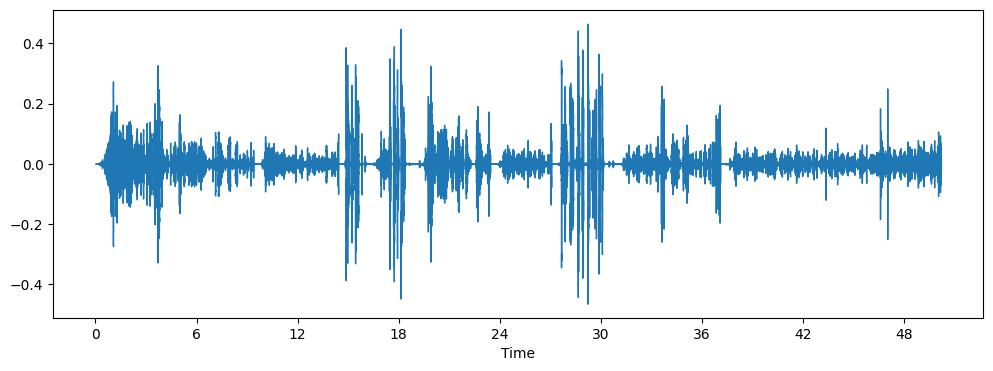

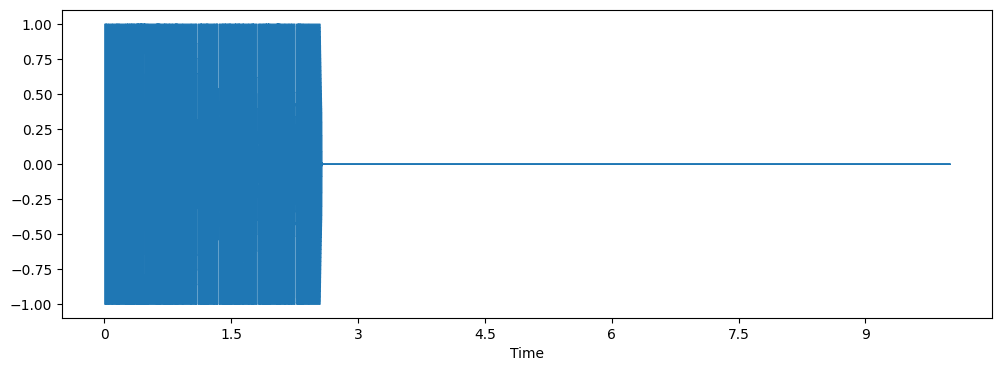

In [36]:
import librosa.display
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y1, sr=sr)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y2,sr=sr, x_axis='time');

In [37]:
from scipy import signal
import random


def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='lowpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [38]:
yf1 = f_high(y1, sr)
yf2 = f_high(y2, sr)

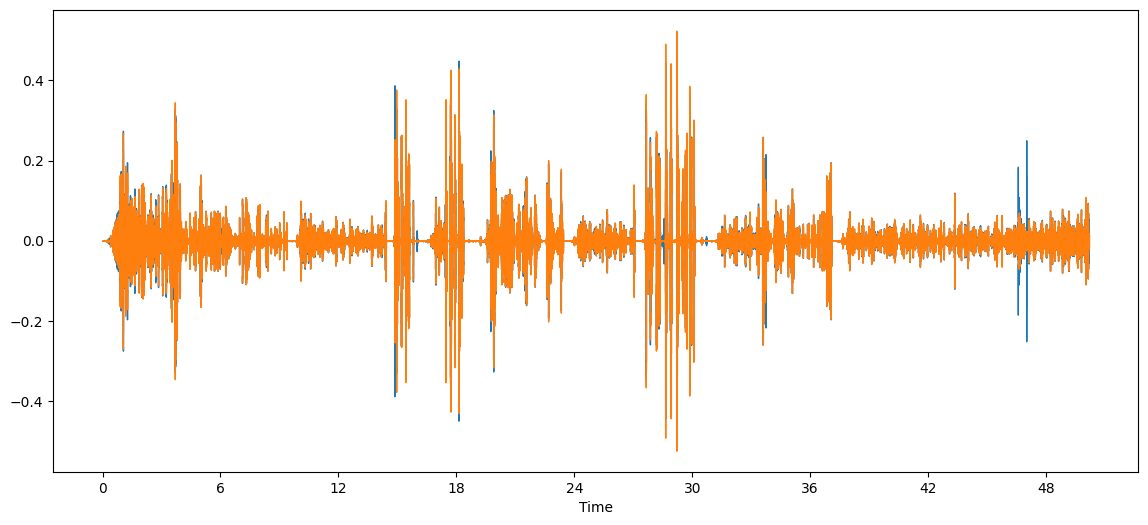

In [39]:
librosa.display.waveshow(y1,sr=sr, x_axis='time');
librosa.display.waveshow(yf1,sr=sr, x_axis='time');

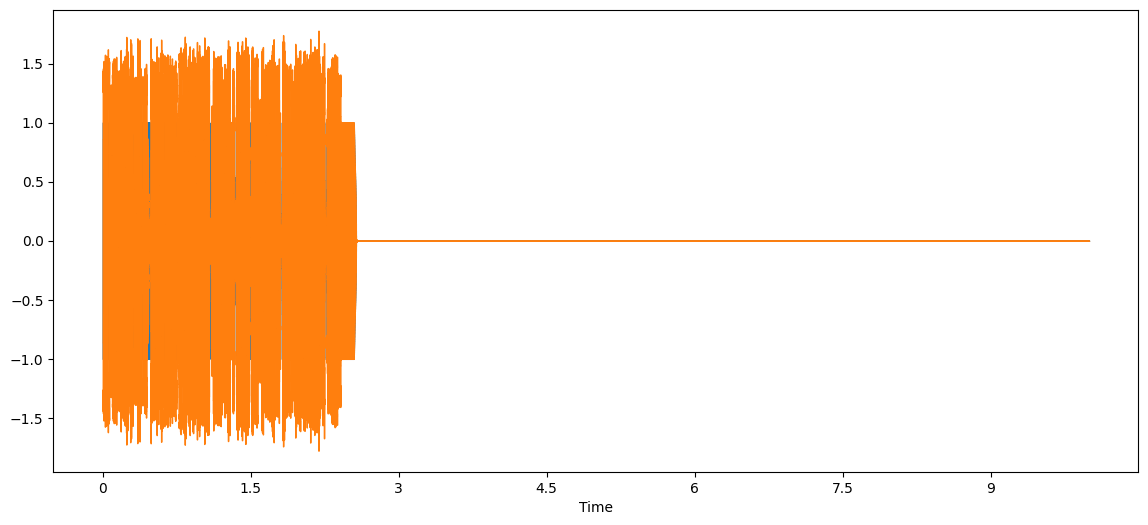

In [40]:
librosa.display.waveshow(y2,sr=sr, x_axis='time');
librosa.display.waveshow(yf2,sr=sr, x_axis='time');

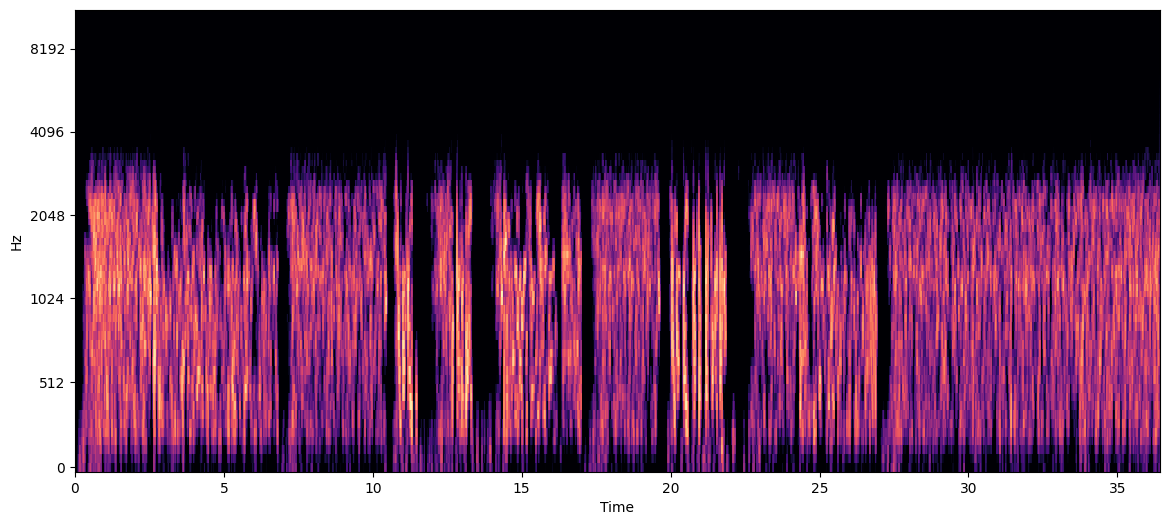

In [41]:
Sf1 = librosa.feature.melspectrogram(y=yf1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel');

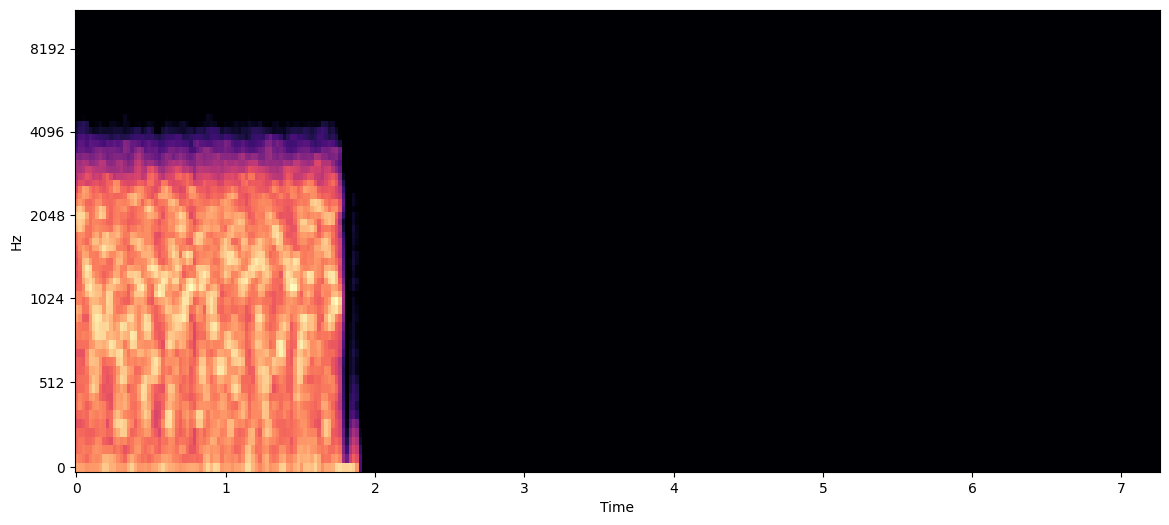

In [42]:
Sf2 = librosa.feature.melspectrogram(y=yf2, sr=sr, n_mels=64)
Df2 = librosa.power_to_db(Sf2, ref=np.max)
librosa.display.specshow(Df2, x_axis='time', y_axis='mel');

In [43]:
display(Audio(yf1,rate=sr))
display(Audio(yf2,rate=sr))

In [45]:
sf.write('new.wav', yf1, sr)

In [60]:
AudioSegment.from_file('new.wav')[15000:18000]+AudioSegment.from_file('new.wav')[25000:36000]+20.export()